# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [4]:
!pip install scikit-learn matplotlib Pillow
!pip install opencv-contrib-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os
import cv2

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [6]:
from google.colab import drive
drive.mount('/content/drive')
!cp -r /content/drive/MyDrive/ATnT .


Mounted at /content/drive


Load and split data

40


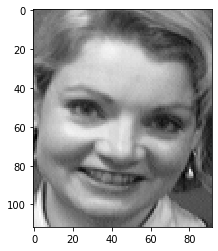

In [7]:
import glob
import regex as re
import random

x=[]
y=[]

def return_image_vector(path):
  with open(path,"r") as img:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return np.array(img).flatten()
def load_and_label_data(dir):
 for subdir, dirs, files in os.walk(dir):
    for file in files:
        tagname=0
        try:
          tagname=int(re.findall(r'\d+', subdir)[0])
        except:
          continue
        
        path=os.path.join(subdir, file)
        x.append(return_image_vector(path))
        y.append(tagname)

load_and_label_data("/content/ATnT")
x_test=[];
y_test=[];

for xlol in range(0,40):
  ind=xlol*9+random.randint(0,9)
  x_test.append(x[ind])    
  # cum_exp_var = np.cumsum(eigenvalue)

  y_test.append(y[ind])
  del x[ind];del y[ind]
print(len(set(y_test)))
x_test=np.array(x_test)
y_test=np.array(y_test)

img=x[1].reshape(112,92)
plt.imshow(img, interpolation='nearest')
plt.gray()


### Playing with the data

(10304,)
<class 'list'>
<class 'numpy.ndarray'>


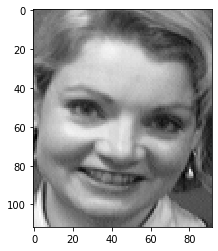

In [8]:
print(x_test[0].shape)
print(type(x))
x=np.array(x)
y=np.array(y)
print(type(x[0]))
N=len(x)
plt.imshow(x[1].reshape(112,92), interpolation='nearest')
plt.gray()
# data is 112x92 shape with 1 channel as it is grayscale.

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

- calculate mean img of each dataset
- the difference of each img from this mean img gives us our matrix M
- calculate covariance matrix of S of M
- calculate its eigenvalues and eigenvectors

In [9]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""

def principalComponentAnalysis(X):
  """
   the steps to calculate mean are:
   Calculate tbe mean and subtract it
   calculate the covariance matrix
   compute eigenvectors and eigenvalue of covariance matrix
   Plot with variance to see the components
  """
  standard_x=[]
  standard_x=(X-np.mean(X,axis=0))
  cov_x = np.dot(standard_x.T,standard_x)/len(standard_x)
  # cov_x=np.cov(standard_x.T)
  eigenvalue,eigenvector=np.linalg.eig(cov_x)

  return eigenvector.real,eigenvalue.real

eigenvector,eigenvalue=principalComponentAnalysis(x)


In [10]:
# sort array according to eigenvalue
e_vecs = eigenvector[:,eigenvalue.argsort()[::-1]]


In [11]:
# with open('/content/drive/MyDrive/eigenvector.npy', 'wb') as f:
#     np.save(f,eigenvector)
# I saved this in gdrive so using this to load

# Choose eigenvectors

variance greater than 99:  295


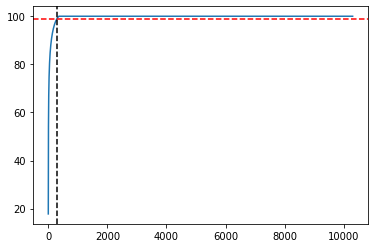

In [12]:
def plot_variance():
    cum_exp_var = np.cumsum(eigenvalue)
    percentage_var = cum_exp_var*100/np.sum(eigenvalue)
    k = np.argmax(percentage_var > 99)
    print("variance greater than 99: ",k)
    plt.plot(percentage_var)
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=99, color="r", linestyle="--")
    plt.show()
    return k,percentage_var

k,var=plot_variance()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

Finding the mean picture, subtracting from X, taking the first k eigenfaces, projecting X on them, performing the dot product between the projection and eigenfaces, and reshaping the image are the steps.

Projecting a new picture onto the eigenfaces gives us a vector of weights (w) that represents the contribution of each eigenface to the new image. We can then use this vector to classify a new image by minimising the euclidean distance between the vectors (w) for all training set images.

In [13]:
# def show_image(x,y):
print(x.shape)
print(k)

(360, 10304)
295


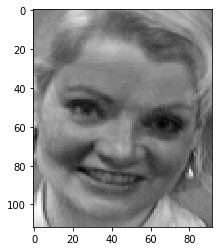

In [14]:
def plot_image(img):# pass a single vector in this
  
  plt.imshow(img, interpolation='nearest')
  plt.gray()

def reconstruct(X, eig_vecs, k):

    X_reconst=X.copy()
    X_reconst=X-np.mean(X_reconst,axis=0)
    eig_vecs = eig_vecs[:,:k]

    eig_vecs = eig_vecs.T # 3072 eigen vector of dimension 3072 each, to get eigenvector we must transform into col vector
    X_reconst = X_reconst.dot(eig_vecs.T)
    X_reconst = X_reconst.dot(eig_vecs)
    X_reconst = X_reconst.real
    X_reconst = X_reconst.reshape((X.shape[0],112, 92)) 
    
    return X_reconst

pca_images=reconstruct(x,e_vecs,k)
plot_image(pca_images[1])


#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

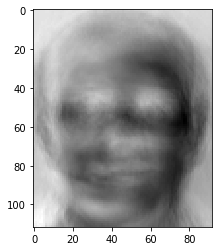

In [15]:
# https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/
pca_images=reconstruct(x,e_vecs,5)
plot_image(pca_images[1])



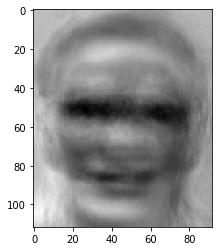

In [16]:

pca_images=reconstruct(x,e_vecs,10)
plot_image(pca_images[1])


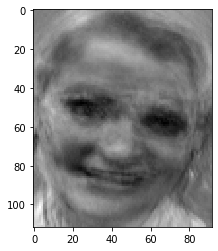

In [17]:

pca_images=reconstruct(x,e_vecs,100)
plot_image(pca_images[1])


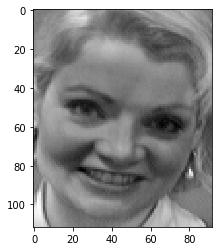

In [18]:

pca_images=reconstruct(x,e_vecs,1000)
plot_image(pca_images[1])


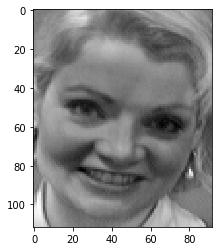

In [19]:

pca_images=reconstruct(x,e_vecs,x.shape[0])
plot_image(pca_images[1])


#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [31]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
"""
Reconstruct image is just re
"""

def model(img,eig_vecs,x,y,k=k):
  eigenfaces=eigenvector[:k]

  w=img-x.mean(axis=0)
  w=eigenfaces@(w.T)
  # print(w.shape)
  weights=eigenfaces@((x-x.mean(axis=0)).T)
  dist=[]
  for val in weights.T:
    dist.append(np.linalg.norm(val.T-w,axis=0))
  img_num=np.argmin(dist)
  err=dist[img_num]
  
  class_=int(img_num/9)
  return img_num,err,class_

img_num,err,class_=model(x_test[39],eigenvector,x,y,k=k)
print(img_num,err,class_)

354 419.16101594938226 39


[0.45, 0.65, 0.975, 1.0, 1.0]


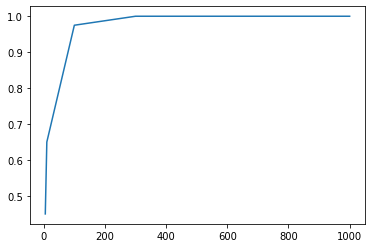

In [21]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
accuracy=[]
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
components=[5,10,100,300,1000]
for val in components:
  class_arr=[]
  for i in range(len(x_test)):
    img_num,err,class_=model(x_test[i],eigenvector,x,y,k=val)
    class_arr.append(class_)
  accuracy.append(accuracy_score(np.array(class_arr),np.arange(0,len(x_test))))
plt.plot(components,accuracy)
print(accuracy)
plt.show()

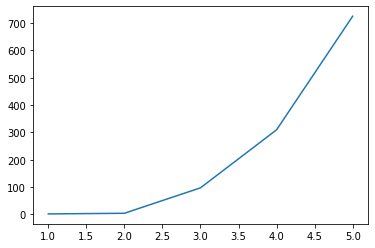

In [22]:
# Plot Number of eigenvectors vs Mean Square Error
mean_sq_arr=[]
components=[5,10,100,300,1000]
for val in components:
  class_arr=[]
  sum_arr=0
  for i in range(len(x_test)):
    img_num,err,class_=model(x_test[i],eigenvector,x,y,k=val)
    sum_arr+=err
  mean_sq_arr.append(sum_arr/len(x_test))
plt.plot(np.arange(1,len(components)+1),mean_sq_arr)
plt.show()

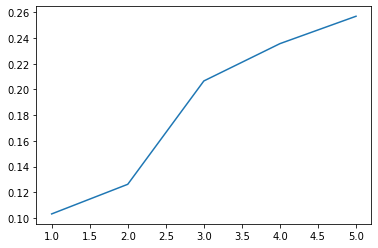

In [23]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
mean_sq_arr=[]
components=[5,10,100,300,1000]
for val in components:
  class_arr=[]
  sum_arr=0
  for i in range(len(x_test)):
    img_num,err,class_=model(x_test[i],eigenvector,x,y,k=val)
    sum_arr+=err
  mean_sq_arr.append(np.log(sum_arr)/len(x_test))
plt.plot(np.arange(1,len(components)+1),mean_sq_arr)
plt.show()

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

*Accuracy:* As a result of merely selecting a few principle components, there is a significant loss of information, which results in low accuracy at first. Yet when we increase the number of principal components, we eventually achieve precision of 1 or very near to 1.

MSE: MSE rises as the number of principal components does. Perhaps the cause is that, as we project our train and test images onto the components and subsequently compute euclidean distances, this distance likewise increases with increasing components.

**Answer:**
PCA in general is that it removes overfitting, increases algorithm speed and removes correlated and redundant components. Limitation can be loss of information and it needs images in a specific order.
For example in the ATnT dataset the images are of front face only but in a real world the images might not be perfect on which PCA fails horribly hence we need a neural model and something more complex like CNN to achieve better results.


